In [1]:
# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

In [2]:
from track2p.ops.default import DefaultTrackOps

from track2p.io.s2p_loaders import load_all_imgs, check_nplanes, load_all_ds_stat_iscell, load_all_ds_mean_img, load_all_ds_centroids
from track2p.io.savers import save_track_ops, save_all_pl_match_mat

from track2p.register.loop import run_reg_loop, reg_all_ds_all_roi
from track2p.register.utils import get_all_ds_img_for_reg, get_all_ref_nonref_inters

from track2p.plot.progress import plot_all_planes
from track2p.plot.output import plot_reg_img_output, plot_thr_met_hist, plot_roi_reg_output, plot_roi_match_multiplane, plot_allroi_match_multiplane

from track2p.match.loop import get_all_ds_assign, get_all_pl_match_mat 


### Start of algo

In [3]:
# 1) Define parameters (TODO: GUI or CLI)
track_ops = DefaultTrackOps()

track_ops.all_ds_path = [
            # # 'data/jm/jm032/2023-10-18_a/', # paths to outputs to where the suite2p folders are located (in order of registration)
            # 'data/jm/jm032/2023-10-19_a/', # TODO: specify in ops that these should be paths to default s2p folder structure path_in_all_ds_path/suite2p/plane0 (with multiple subfolders for each plane if more than 1)
            # 'data/jm/jm032/2023-10-20_a/',
            # 'data/jm/jm032/2023-10-21_a/',
            # 'data/jm/jm032/2023-10-22_a/',
            # 'data/jm/jm032/2023-10-23_a/',
    
            'data_proc/jm/jm019/2023-04-05_a',
            'data_proc/jm/jm019/2023-04-06_a',
            'data_proc/jm/jm019/2023-04-07_a',
            'data_proc/jm/jm019/2023-04-08_a'
            ]

track_ops.save_path = 'data_proc/jm/jm019/' # path where to save the outputs of algorithm (a 'track2p' folder will be created where figures for visualisation and matrices of matches would be saved)
track_ops.reg_chan = 1 # channel to use for registration (0=functional, 1=anatomical) (use 0 if only recording gcamp!)

track_ops.init_save_paths() # creates save paths if they don't exist

Directory already exists: data_proc/jm/jm019/track2p/
Directory already exists: data_proc/jm/jm019/track2p/fig/


In [4]:
track_ops.to_dict();

DefaultTrackOps successfully transformed to dictionary; keys:
all_ds_path
iou_dist_thr
iscell_thr
matching_method
reg_chan
sat_perc
save_path
save_path_fig
show_roi_reg_output
thr_method
thr_remove_zeros
transform_type
win_size


Found 1 planes in data_proc/jm/jm019/2023-04-05_a
Found 1 planes in data_proc/jm/jm019/2023-04-06_a
Found 1 planes in data_proc/jm/jm019/2023-04-07_a
Found 1 planes in data_proc/jm/jm019/2023-04-08_a
Found 1 planes in all datasets
nchannels: 2 for plane 0 in dataset data_proc/jm/jm019/2023-04-05_a
nchannels: 2 for plane 0 in dataset data_proc/jm/jm019/2023-04-06_a
nchannels: 2 for plane 0 in dataset data_proc/jm/jm019/2023-04-07_a
nchannels: 2 for plane 0 in dataset data_proc/jm/jm019/2023-04-08_a
Found 2 channels in all datasets


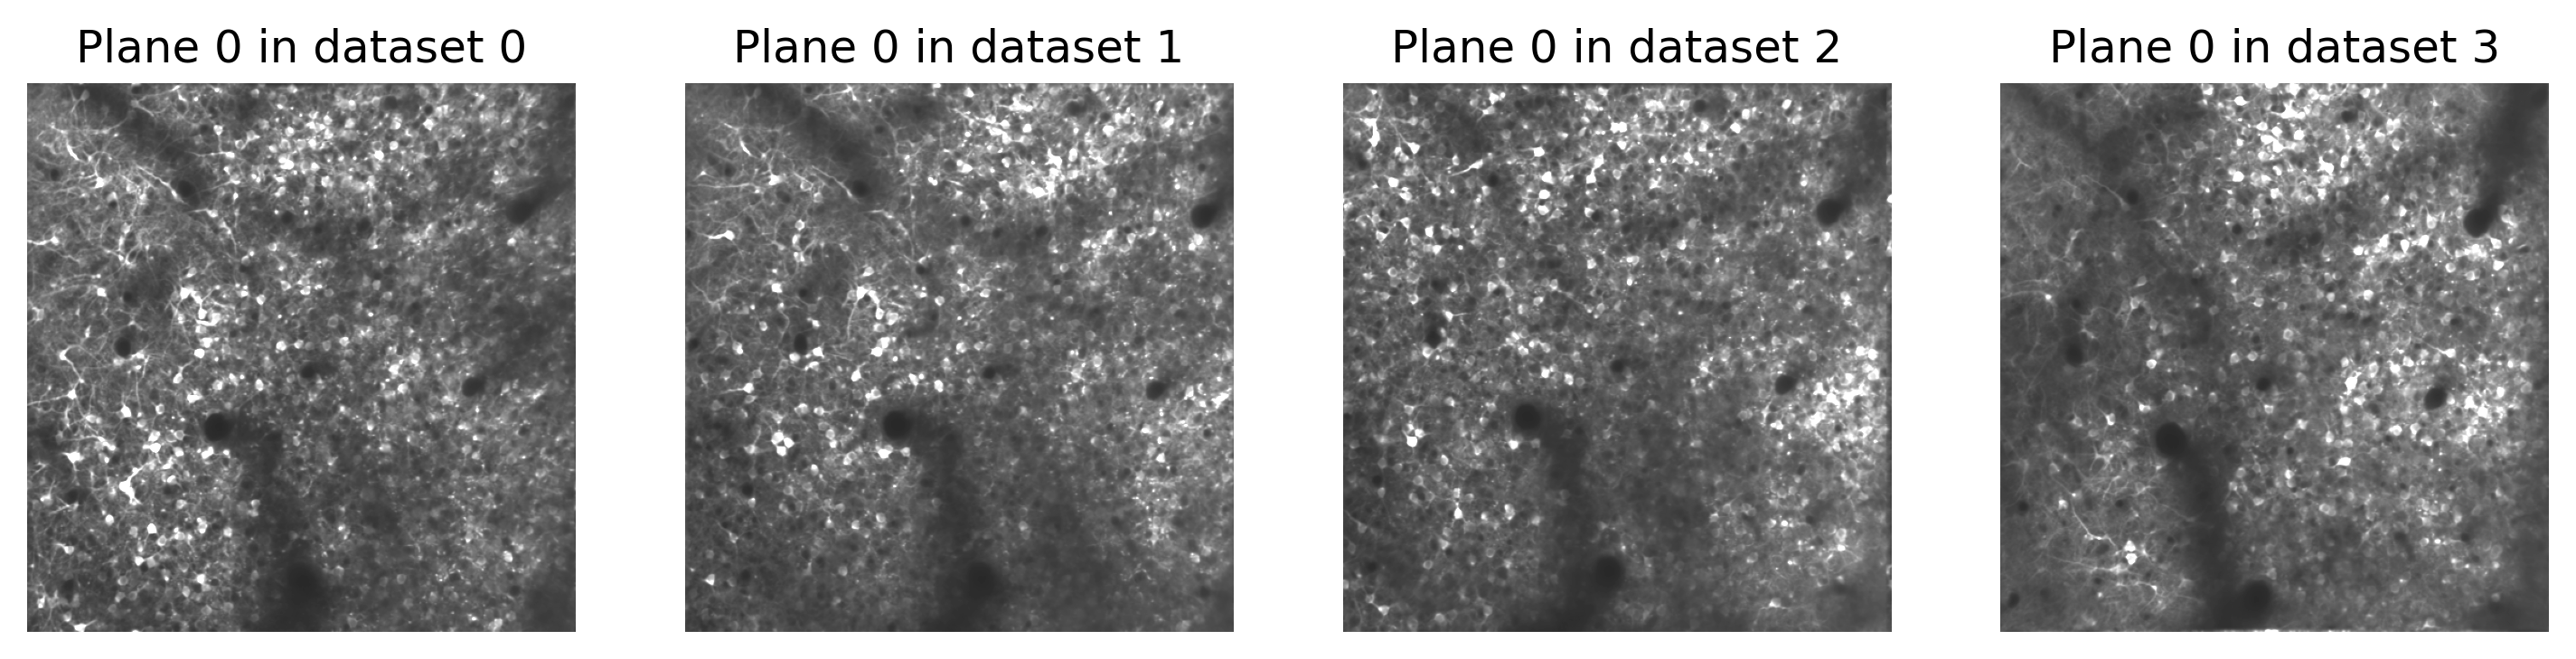

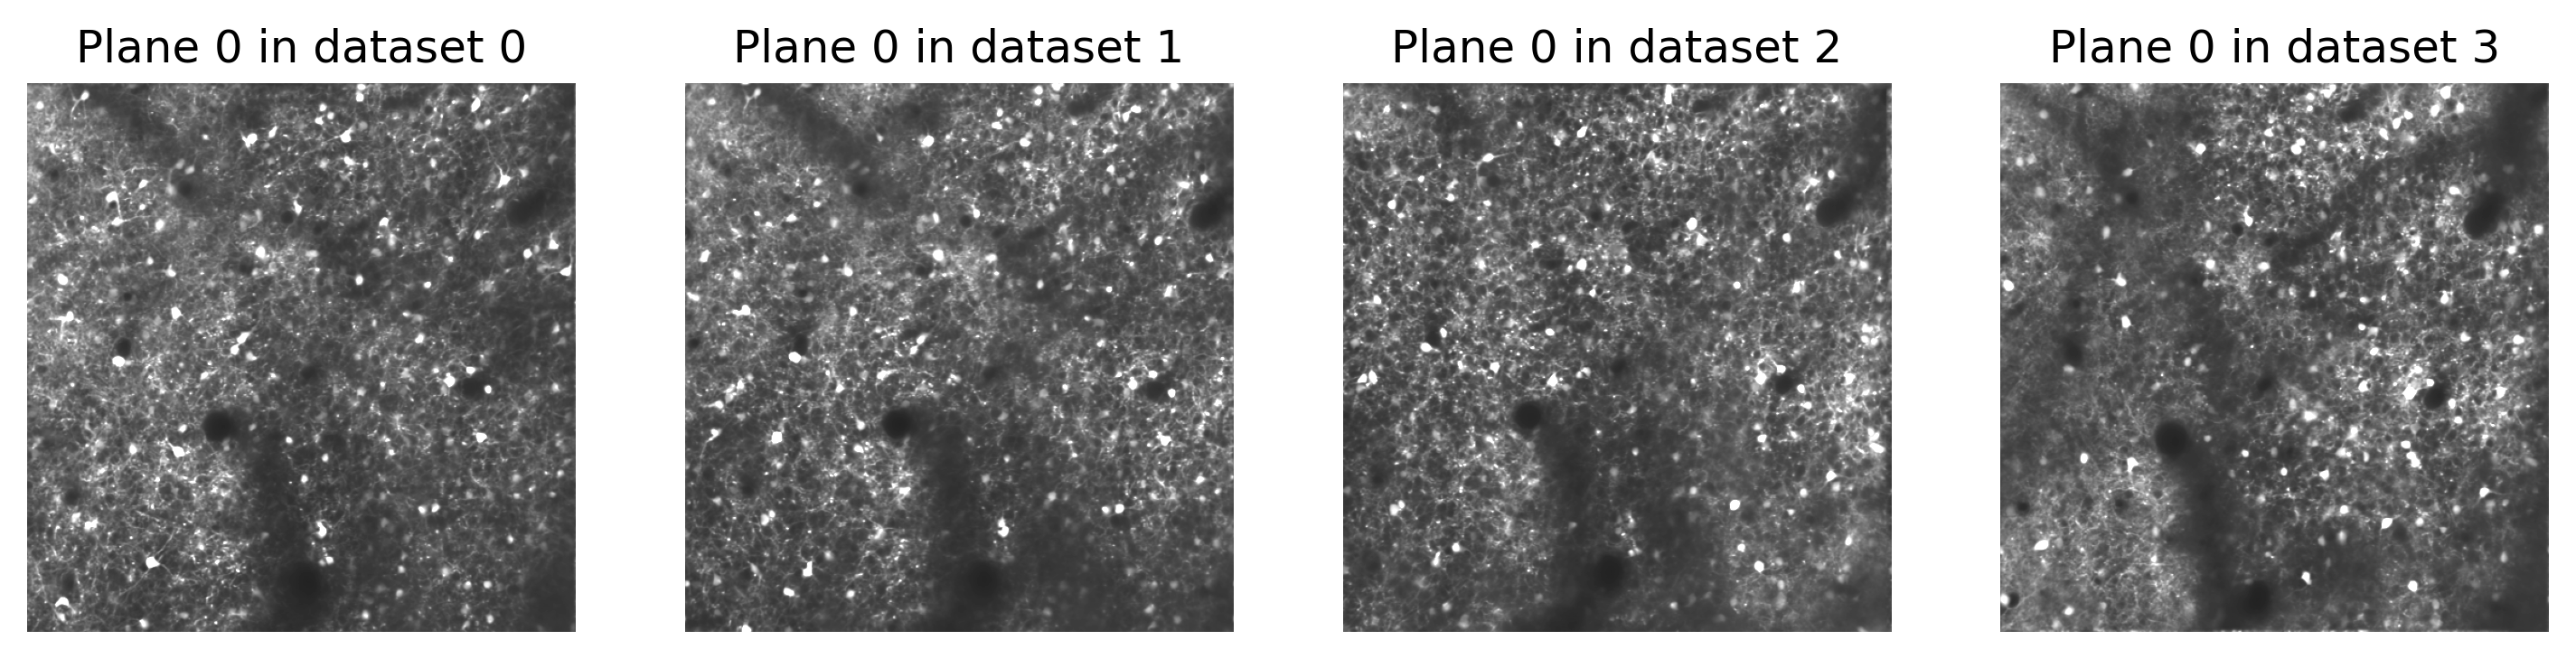

In [5]:
# 2) Load data
check_nplanes(track_ops)
all_ds_avg_ch1, all_ds_avg_ch2 = load_all_imgs(track_ops)

# 3) Plot available planes for registration (TODO: the user needs to make sure their recordings can be matched, i. e. we can spot the same cells by eye in the different recordings, TODO: allow user to choose interactiverly which channel to use?)
plot_all_planes(all_ds_avg_ch1, track_ops)
if track_ops.nchannels==2:
    plot_all_planes(all_ds_avg_ch2, track_ops)

In [6]:
# 4) do the actual registration based on chosen channel
all_ds_ref_img, all_ds_mov_img = get_all_ds_img_for_reg(all_ds_avg_ch1, all_ds_avg_ch2, track_ops)
all_ds_mov_img_reg, all_ds_reg_params = run_reg_loop(all_ds_ref_img, all_ds_mov_img, track_ops) # TODO: save basic parameters for each registration as feedback (e. g. ammoung of shift, rotation, etc.) for later plotting
plot_reg_img_output(track_ops)

AttributeError: all_ds_all_roi_array_mov

### Applying transform to all ROIs and visualising

In [ ]:
all_ds_all_roi_ref, all_ds_all_roi_mov, all_ds_all_roi_reg, all_ds_roi_counter = reg_all_ds_all_roi(all_ds_reg_params, track_ops)

...
Transforming ROIs for registration 0/3
Loading ROIs for plane0 in dataset jm019
Chose 538/1890 ROIs, based on s2p iscell threshold 0.8 (see track_ops.iscell_thr)
Loading ROIs for plane0 in dataset jm019
Chose 718/2412 ROIs, based on s2p iscell threshold 0.8 (see track_ops.iscell_thr)
Done with dataset...
...
Transforming ROIs for registration 1/3
Loading ROIs for plane0 in dataset jm019
Chose 718/2412 ROIs, based on s2p iscell threshold 0.8 (see track_ops.iscell_thr)
Loading ROIs for plane0 in dataset jm019
Chose 897/2544 ROIs, based on s2p iscell threshold 0.8 (see track_ops.iscell_thr)
Done with dataset...
...
Transforming ROIs for registration 2/3
Loading ROIs for plane0 in dataset jm019
Chose 897/2544 ROIs, based on s2p iscell threshold 0.8 (see track_ops.iscell_thr)
Loading ROIs for plane0 in dataset jm019
Chose 609/1849 ROIs, based on s2p iscell threshold 0.8 (see track_ops.iscell_thr)
Done with dataset...


In [ ]:
# compute intersection (this is only needed for plotting below)
all_ds_ref_reg_inters = get_all_ref_nonref_inters(all_ds_all_roi_ref, all_ds_all_roi_reg, track_ops)
all_ds_ref_mov_inters = get_all_ref_nonref_inters(all_ds_all_roi_ref, all_ds_all_roi_mov, track_ops)

track_ops.all_ds_ref_mov_inters = all_ds_ref_mov_inters
track_ops.all_ds_ref_reg_inters = all_ds_ref_reg_inters

# this line is very memory-intensive because of the ROIS (TODO: maybe instead of contours just plot RGB) (or somehow generate RGB image of contours (in the part before))
if track_ops.show_roi_reg_output:
    plot_roi_reg_output(track_ops)

### Matching ROIs

In [ ]:
all_ds_assign, all_ds_assign_thr, all_ds_thr_met, all_ds_thr = get_all_ds_assign(track_ops, all_ds_all_roi_ref, all_ds_all_roi_reg)

Finding matches in ref-reg pair: 1/3
IndexError in get_centroids
roi index 227
IndexError in get_centroids
roi index 503
IndexError in get_centroids
roi index 614
IndexError in get_centroids
roi index 696
cost_mat computed with method: iou
cost_mat shape: (538, 718)
cost_mat min: 0.05714285714285716
cost_mat max: 1.0
Done ref-reg pair: 1/3
Finding matches in ref-reg pair: 2/3
IndexError in get_centroids
roi index 46
IndexError in get_centroids
roi index 69
IndexError in get_centroids
roi index 120
IndexError in get_centroids
roi index 251
IndexError in get_centroids
roi index 287
IndexError in get_centroids
roi index 335
IndexError in get_centroids
roi index 425
IndexError in get_centroids
roi index 445
IndexError in get_centroids
roi index 450
IndexError in get_centroids
roi index 457
IndexError in get_centroids
roi index 515
IndexError in get_centroids
roi index 538
IndexError in get_centroids
roi index 549
IndexError in get_centroids
roi index 565
IndexError in get_centroids
roi ind

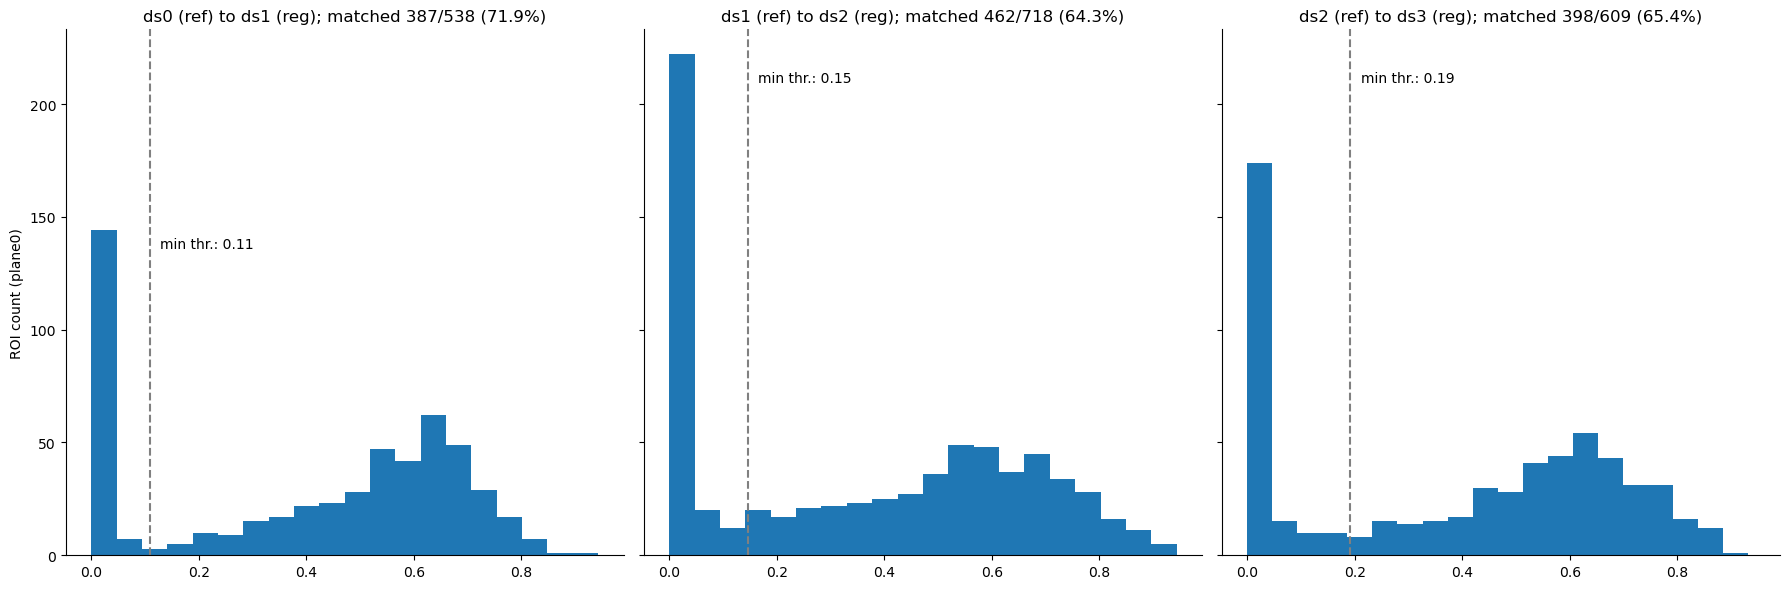

In [ ]:
plot_thr_met_hist(all_ds_thr_met, all_ds_thr, track_ops)

In [ ]:
all_pl_match_mat = get_all_pl_match_mat(all_ds_all_roi_ref, all_ds_assign_thr, track_ops)

Number of ROIs tracked in plane0 across all days: 159


In [ ]:
save_track_ops(track_ops)
save_all_pl_match_mat(all_pl_match_mat, track_ops)

DefaultTrackOps successfully transformed to dictionary; keys:
all_ds_all_roi_array_mov
all_ds_all_roi_array_ref
all_ds_all_roi_array_reg
all_ds_avg_ch1
all_ds_avg_ch2
all_ds_mov_img
all_ds_mov_img_reg
all_ds_nchannels
all_ds_path
all_ds_ref_img
all_ds_ref_mov_inters
all_ds_ref_reg_inters
all_ds_roi_counter
all_nplanes
all_pl_match_mat
iou_dist_thr
iscell_thr
matching_method
n_tracked
nchannels
nplanes
reg_chan
sat_perc
save_path
save_path_fig
show_roi_reg_output
thr_method
thr_remove_zeros
transform_type
win_size
Saved track_ops.npy in data_proc/jm/jm019/track2p/


### Visualising output

In [ ]:
del track_ops

In [ ]:
# get centroids of all ROIs
track_ops



all_ds_stat_iscell = load_all_ds_stat_iscell(track_ops)
all_ds_centroids = load_all_ds_centroids(all_ds_stat_iscell, track_ops)
all_ds_mean_img = load_all_ds_mean_img(track_ops)

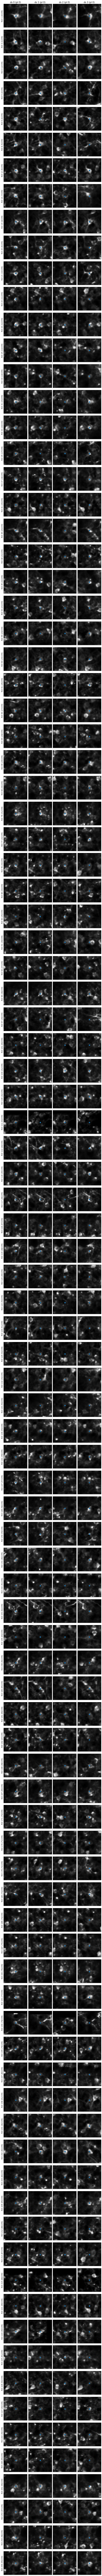

KeyboardInterrupt: 

In [ ]:
# TODO: match histogram to the first roi of first batch (not first roi of each batch)
plot_roi_match_multiplane(all_ds_mean_img, all_ds_centroids, all_pl_match_mat, track_ops, win_size=track_ops.win_size)

Loading ROIs for plane0 in dataset jm019
Chose 837/1890 ROIs, based on s2p iscell threshold 0.5 (see track_ops.iscell_thr)


KeyboardInterrupt: 

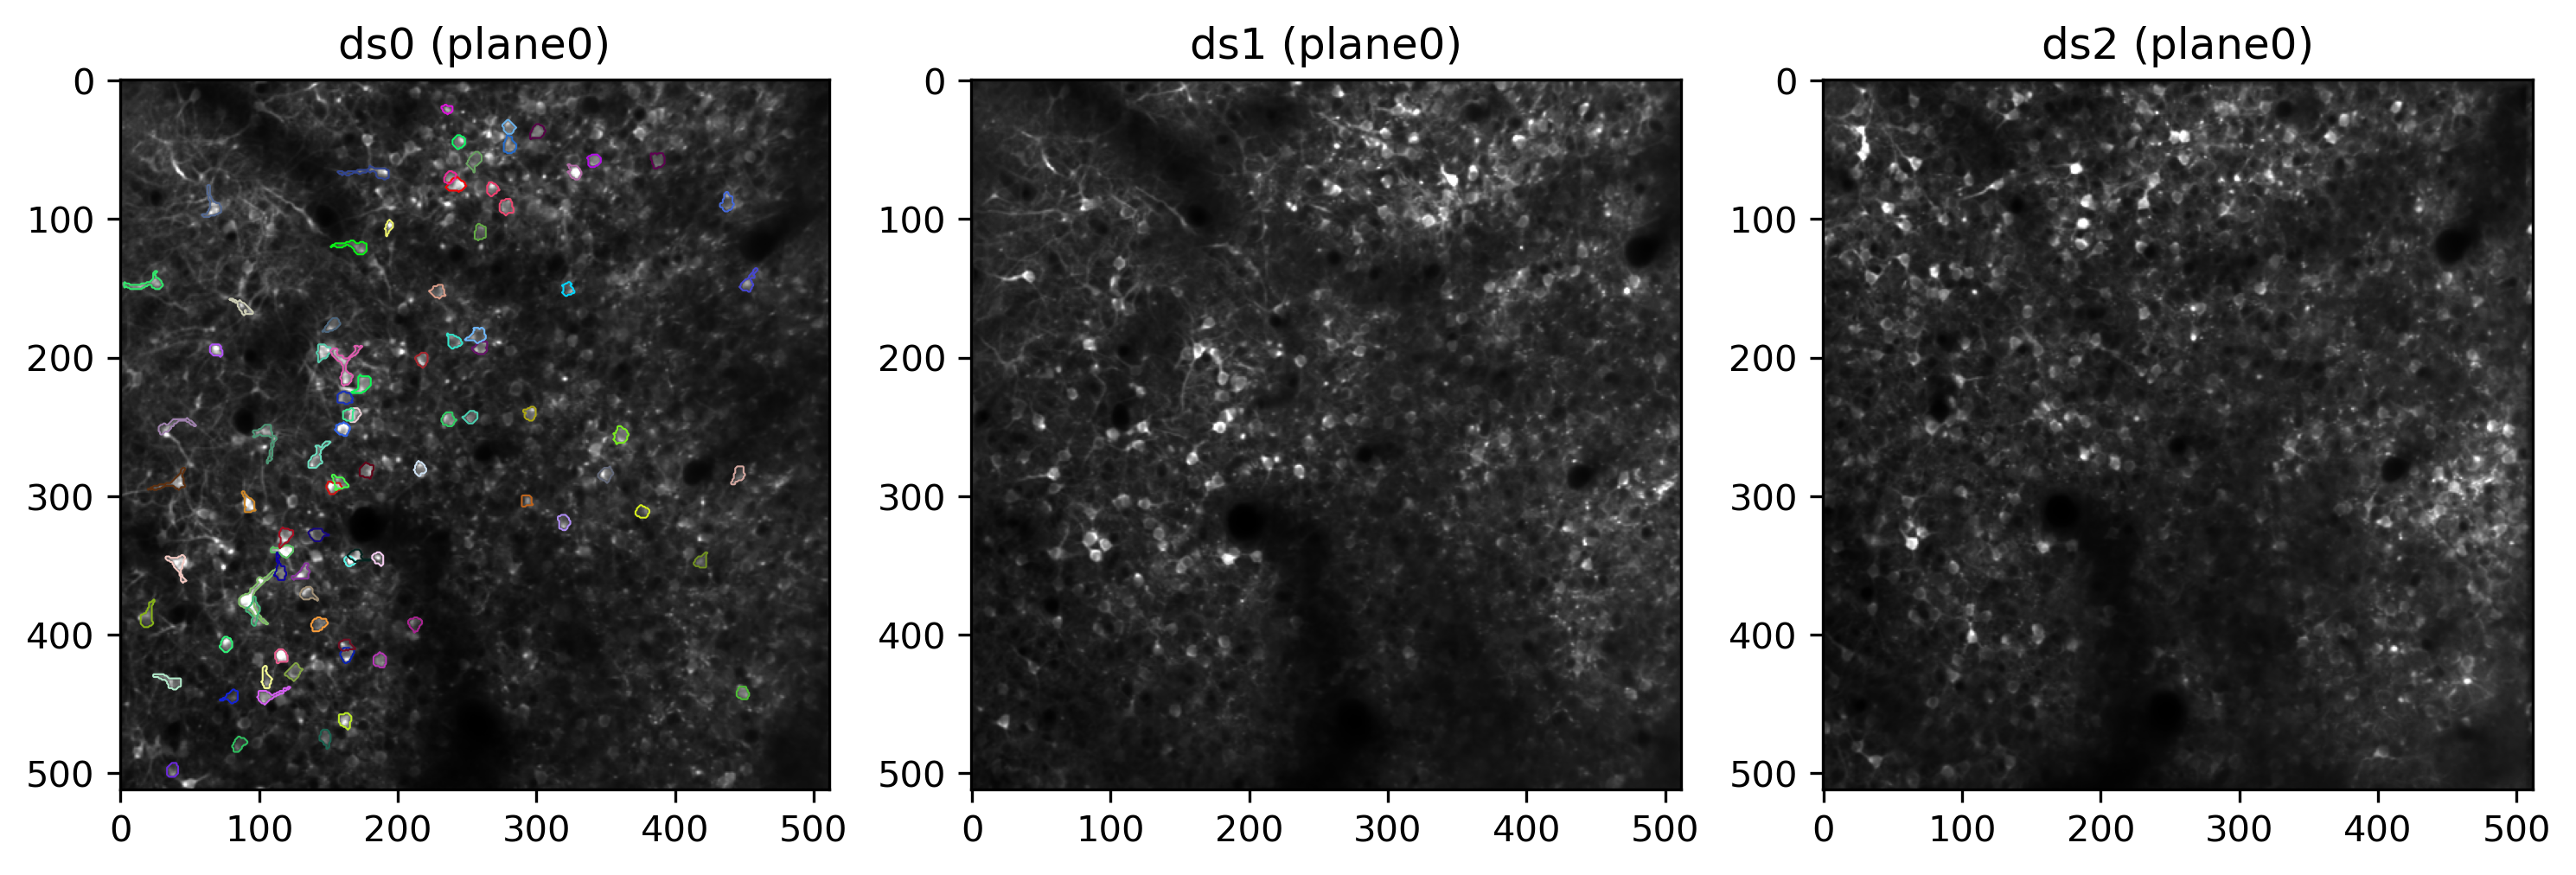

In [ ]:
plot_allroi_match_multiplane(all_ds_mean_img, all_pl_match_mat, track_ops)

In [ ]:
print('Track ops at the end of the script:')
track_ops.to_dict();